In [20]:
print("suga")

suga


In [21]:
import pandas as pd

dataUrl = "./Salary_Data.csv"


data = pd.read_csv(dataUrl)



In [22]:
x = data["YearsExperience"]
y = data["Salary"]

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def Draw(w, b):
  yNew = w * x + b
  plt.plot(x, yNew, color="blue")
  plt.scatter(x, y, color="red")
  plt.show()

def CalculateCost(x, y, w, b):
  yNew = x * w + b
  c = (y - yNew) ** 2
  sum = c.sum()
  return sum

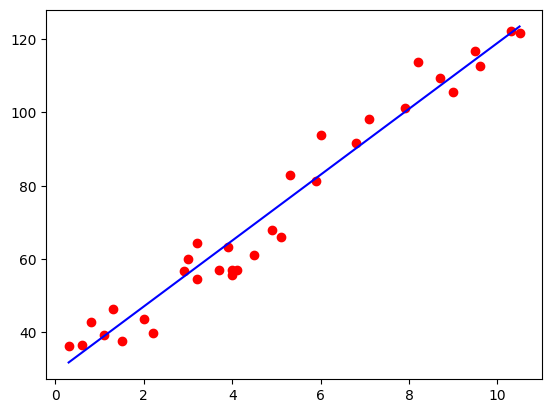

In [24]:
import matplotlib.pyplot as plt
import numpy as np


def Force():
  ws = np.arange(-100, 101)
  bs = np.arange(-100, 101)

  costs = np.zeros((201, 201))

  i = 0
  j = 0

  for w in ws:
    j = 0
    for b in bs:
      costs[i, j] = CalculateCost(x, y, w, b)
      j += 1
    i += 1

  indexX, indexY = np.where(costs == np.min(costs))
  Draw(ws[indexX], bs[indexY])

Force()





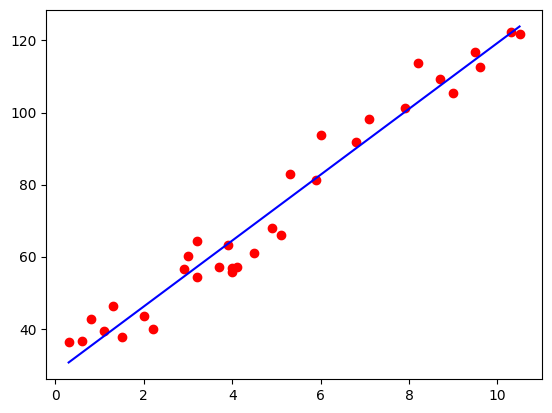

In [25]:
def Gradient(w, b):
  wG = (2 * x * (x * w + b - y)).mean()
  bG = (2 * (x * w + b - y)).mean()
  return wG, bG

def GradientRun(maxNum, learningRate):
  initW = 0
  initB = 0
  costBack = -1
  for i in range(maxNum):
    stepW, stepB = Gradient(initW, initB)
    initW -= learningRate * stepW
    initB -= learningRate * stepB
    cost = CalculateCost(x, y, initW, initB)
    if(costBack < 0 or costBack > cost):
      costBack = cost
    elif(costBack < cost):
      return initW + learningRate * stepW, initB + learningRate * stepB
  return initW, initB


w, b = GradientRun(1000, 0.01)

Draw(w, b)

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
dataUrl = "./Salary_Data2.csv"

data = pd.read_csv(dataUrl)
data["EducationLevel"] = data["EducationLevel"].map({"高中以下":0, "大學":1,"碩士以上":2})

encoder = OneHotEncoder()
encoder.fit(data[["City"]])
cityData = encoder.transform(data[["City"]]).toarray()
data[["CityA", "CityB", "CityC"]] = cityData
data = data.drop(["City", "CityC"], axis=1)

x = data[["YearsExperience", "EducationLevel", "CityA", "CityB"]]
y = data["Salary"]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=87)
xTrain = xTrain.to_numpy()
xTest = xTest.to_numpy()



w = np.array([1, 2, 3, 4])
b = 10
yCalc = (xTrain*w).sum(axis=1) + b
yCalc

array([19.1, 27.6, 21.3, 13.1, 21.3, 19.6, 18.3, 27. , 17.9, 16. , 19.7,
       23.8, 15.4, 23.7, 20.7, 19.1, 16.1, 23.3, 25.9, 21. , 18.4, 18.2,
       18.2, 19.8, 16.5, 25.9, 18.5, 21.6, 20.9, 20.4, 26.2, 21.1, 23.2,
       25.4, 18.5, 19.1, 20.6, 21. , 21.8, 23.4, 20.4, 20.3, 18.4, 16.4,
       20.1, 23.4, 20.3, 24.7, 17.8, 24.4, 20. , 17.9, 23.1, 22.4, 20. ,
       21.9, 20.3, 14.9, 16.1, 20.8, 19.8, 19. , 21.5, 15.4, 25. , 25.9,
       21.5, 19.9, 21.1, 21.1, 17.6, 18.8, 18.1, 17.1, 19.7, 15.3, 24.5,
       16.7, 23.6, 20.6, 23.7, 16.3, 22.5, 17.2, 19. , 21.2, 24.2, 19. ,
       21.9, 24.2, 18.3, 18.5, 16.5, 13.9, 24.7, 21.5, 15.6, 19.6, 24.6,
       25.7, 26.7, 23.6, 15.5, 16.3, 22.5, 22.3, 17.6, 18.4])

In [27]:
def CalculateCostNew(x, y, w, b):
  yCalc = (x*w).sum(axis=1) + b
  av = ((yCalc - y) ** 2).mean()
  return av

def GradientNew(x, y, w, b):
  yCalc = (x*w).sum(axis=1) + b
  bG = (yCalc - y).mean()
  wG = np.zeros(x.shape[1])
  for i in range(x.shape[1]):
    wG[i] = (x[:, i] * (yCalc - y)).mean()
  return wG, bG
def GradientRunNew(x, y, maxNum, learningRate):
  initW = np.array([0.0, 0.0, 0.0, 0.0])
  initB = 0
  costBack = -1
  for i in range(maxNum):
    stepW, stepB = GradientNew(x, y, initW, initB)
    initW -= learningRate * stepW
    initB -= learningRate * stepB
    cost = CalculateCostNew(x, y, initW, initB)
    if(i % 10 == 0):
      print(f"Running, {i/maxNum * 100:.2f}%")
    if(costBack < 0 or costBack > cost):
      costBack = cost
    elif(costBack < cost):
      print("over")
      return initW + learningRate * stepW, initB + learningRate * stepB

  return initW, initB


w, b = GradientRunNew(xTrain, yTrain, 10000, 0.001)


Running, 0.00%
Running, 0.10%
Running, 0.20%
Running, 0.30%
Running, 0.40%
Running, 0.50%
Running, 0.60%
Running, 0.70%
Running, 0.80%
Running, 0.90%
Running, 1.00%
Running, 1.10%
Running, 1.20%
Running, 1.30%
Running, 1.40%
Running, 1.50%
Running, 1.60%
Running, 1.70%
Running, 1.80%
Running, 1.90%
Running, 2.00%
Running, 2.10%
Running, 2.20%
Running, 2.30%
Running, 2.40%
Running, 2.50%
Running, 2.60%
Running, 2.70%
Running, 2.80%
Running, 2.90%
Running, 3.00%
Running, 3.10%
Running, 3.20%
Running, 3.30%
Running, 3.40%
Running, 3.50%
Running, 3.60%
Running, 3.70%
Running, 3.80%
Running, 3.90%
Running, 4.00%
Running, 4.10%
Running, 4.20%
Running, 4.30%
Running, 4.40%
Running, 4.50%
Running, 4.60%
Running, 4.70%
Running, 4.80%
Running, 4.90%
Running, 5.00%
Running, 5.10%
Running, 5.20%
Running, 5.30%
Running, 5.40%
Running, 5.50%
Running, 5.60%
Running, 5.70%
Running, 5.80%
Running, 5.90%
Running, 6.00%
Running, 6.10%
Running, 6.20%
Running, 6.30%
Running, 6.40%
Running, 6.50%
Running, 6

In [32]:
import pandas as pd


yRes = (w * x).sum(axis=1) + b
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.DataFrame({
    "test":yRes,
    "ans":y
})

,test,ans
0,42.265129,56.3
1,58.878694,53.2
2,49.442290,45.6
3,64.324254,72.8
4,38.873518,40.5
5,63.574836,67.4
6,50.358376,51.7
7,34.721500,39.2
8,63.569342,75.6
9,45.451446,41.8
